In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/archive

Streaming output truncated to the last 5000 lines.
  inflating: food-101/food-101/images/tacos/1033196.jpg  
  inflating: food-101/food-101/images/tacos/1036030.jpg  
  inflating: food-101/food-101/images/tacos/1042175.jpg  
  inflating: food-101/food-101/images/tacos/1044043.jpg  
  inflating: food-101/food-101/images/tacos/1058697.jpg  
  inflating: food-101/food-101/images/tacos/1059239.jpg  
  inflating: food-101/food-101/images/tacos/1059326.jpg  
  inflating: food-101/food-101/images/tacos/1066762.jpg  
  inflating: food-101/food-101/images/tacos/1070967.jpg  
  inflating: food-101/food-101/images/tacos/1073468.jpg  
  inflating: food-101/food-101/images/tacos/1075296.jpg  
  inflating: food-101/food-101/images/tacos/1085243.jpg  
  inflating: food-101/food-101/images/tacos/108529.jpg  
  inflating: food-101/food-101/images/tacos/1086014.jpg  
  inflating: food-101/food-101/images/tacos/108945.jpg  
  inflating: food-101/food-101/images/tacos/1089575.jpg  
  inflating: food-101/f

In [4]:
#ImageDataGenerator class from keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import save_img

In [17]:
img = load_img('/content/food-101/food-101/images/apple_pie/1005649.jpg', color_mode='grayscale')

# convert to numpy array
img_array = img_to_array(img)


In [22]:
newsize = (500,500)

img.resize(newsize)
img_array = img_to_array(img)

save_img('/content/food-101/formatted/apple_pie/1.jpg', img_array)

Populating the interactive namespace from numpy and matplotlib


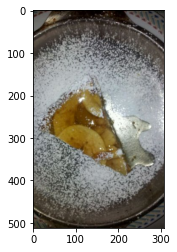

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/food-101/food-101/images/apple_pie/1005649.jpg')
imgplot = plt.imshow(img)
plt.show()

# Read through DB and grab all images


In [ ]:
from pathlib import Path
file = open('/content/food-101/food-101/meta/classes.txt', 'r')
labelStr = file.read()
labels = labelStr.split()
counter = 0
labDict = {}
for label in labels:
  if not bool(labDict) or label not in labDict:
    labDict[label] = counter
    counter += 1
  else:
    continue

pathlist = Path('/content/food-101/food-101/').glob('**/*.jpg')
X = []
Y = []
counter = 0
for path in pathlist:
     # because path is object not string
     path_in_str = str(path)
     direct = path_in_str.split('/')
     category = direct[direct.index('food-101')+3]

     #X is pixel data 
     img = load_img(path_in_str, color_mode='grayscale')
     #resize to make images' size consistent
     newsize = (500,500)
     img = img.resize(newsize)
     #convert to list
     xArr = img_to_array(img)
     imgArr = asarray(xArr)
     X.append(imgArr)

     #Y is categorical data
     catNum = labDict[category]
     Y.append(catNum)
     counter += 1

X = array(X)
Y = array(Y)
print(X.shape)
print(Y.shape)


Streaming output truncated to the last 5000 lines.
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)
(500, 500)
(500, 500, 1)

# Old CNN practice


In [ ]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

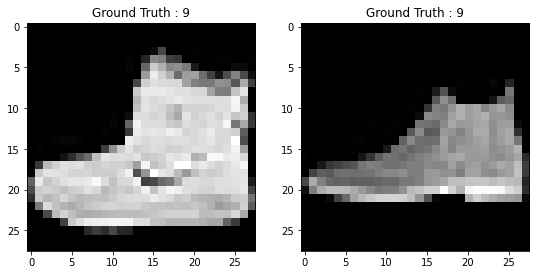

In [ ]:
plt.figure(figsize=[9,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [ ]:
print("before: " + str(train_X.shape))

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

NameError: ignored

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import utils

hot_train_Y = tf.keras.utils.to_categorical(train_Y)
hot_test_Y = tf.keras.utils.to_categorical(test_Y)

In [ ]:
print(str(train_Y.shape))
print(str(hot_train_Y.shape))
print("before: " + str(train_Y[0]))
print("after: " + str(hot_train_Y[0]))

(60000,)
(60000, 10)
before: 9
after: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, hot_train_Y, test_size=0.2)

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Normalization
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import optimizers


In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(.2))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(.2))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(.25))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))             
fashion_model.add(Dropout(.4))     
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
fashion_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 12s 15ms/step - loss: 0.5855 - accuracy: 0.7831 - val_loss: 0.3491 - val_accuracy: 0.8729
Epoch 2/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3680 - accuracy: 0.8656 - val_loss: 0.3340 - val_accuracy: 0.8742
Epoch 3/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3191 - accuracy: 0.8821 - val_loss: 0.2751 - val_accuracy: 0.8978
Epoch 4/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2915 - accuracy: 0.8910 - val_loss: 0.2560 - val_accuracy: 0.9080
Epoch 5/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2679 - accuracy: 0.9015 - val_loss: 0.2550 - val_accuracy: 0.9076
Epoch 6/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2565 - accuracy: 0.9066 - val_loss: 0.2346 - val_accuracy: 0.9131
Epoch 7/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2425 - accuracy: 0.9101 - val_loss: 0.2289 - val_accuracy:

In [ ]:
fashion_model.save("mm.h5py")

INFO:tensorflow:Assets written to: mm.h5py/assets


In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(Dropout(.1))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.2))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(.25))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))             
fashion_model.add(Dropout(.4))     
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 12s 15ms/step - loss: 0.5417 - accuracy: 0.8020 - val_loss: 0.3451 - val_accuracy: 0.8731
Epoch 2/20
750/750 [==============================] - 11s 14ms/step - loss: 0.3358 - accuracy: 0.8770 - val_loss: 0.3041 - val_accuracy: 0.8915
Epoch 3/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2896 - accuracy: 0.8933 - val_loss: 0.2630 - val_accuracy: 0.9033
Epoch 4/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2638 - accuracy: 0.9037 - val_loss: 0.2477 - val_accuracy: 0.9082
Epoch 5/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2415 - accuracy: 0.9101 - val_loss: 0.2318 - val_accuracy: 0.9159
Epoch 6/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2275 - accuracy: 0.9161 - val_loss: 0.2373 - val_accuracy: 0.9096
Epoch 7/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2122 - accuracy: 0.9205 - val_loss: 0.2295 - val_accuracy: